# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,624,84,36,75,136,55,6,140,48,18,125,166,290,138,71,4,36,189,195
1,242,85,42,59,132,58,7,149,46,19,144,166,320,172,83,8,4,179,182
2,823,105,54,105,213,67,10,200,33,23,163,214,597,214,68,10,20,190,198
3,275,87,44,70,179,75,6,146,45,19,141,167,326,178,69,6,1,194,201
4,41,88,37,51,105,52,5,119,57,17,128,135,207,125,86,8,16,179,183
5,814,85,43,66,123,55,7,150,45,19,146,172,326,173,83,4,15,180,183
6,839,90,44,72,157,64,8,137,48,18,144,159,283,171,65,9,4,196,203
7,737,105,51,93,160,51,7,217,30,24,165,240,703,208,81,9,25,188,188
8,228,105,54,106,215,68,10,208,32,24,166,217,640,218,69,14,23,189,199
9,472,105,50,93,173,54,4,222,30,25,159,254,735,206,83,4,12,186,184


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.852459,93.652095,44.783242,81.821494,167.928962,61.322404,8.285974,168.457195,41.018215,20.546448,147.759563,187.985428,437.923497,174.276867,72.202186,6.298725,12.457195,188.941712,195.570128
std,249.776897,8.234535,6.161039,15.550395,32.735398,6.720968,3.208139,33.093328,7.749007,2.583661,14.420324,30.821711,176.554456,32.504012,6.574469,4.963923,8.859430,6.157325,7.448920
min,2.000000,76.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,196.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,168.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,431.000000,92.000000,44.000000,78.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,178.000000,363.000000,172.000000,71.000000,6.000000,11.000000,188.000000,196.000000
75%,634.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.000000,197.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,322.000000,133.000000,48.000000,265.000000,61.000000,29.000000,188.000000,287.000000,1018.000000,268.000000,97.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

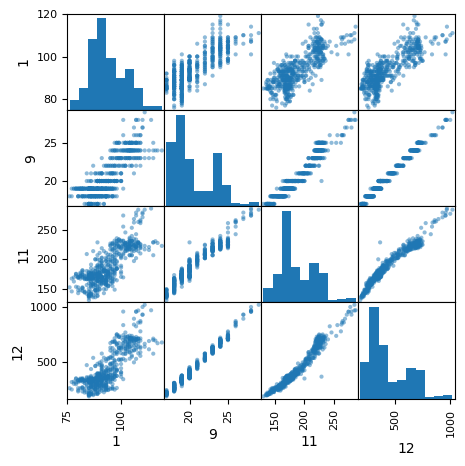

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

listInd = [1, 9, 11, 12]
scatter_matrix(X_train_pd[listInd], figsize=(5, 5))
plt.show()

The difference for some features is orders of magnitude different (9 and 12) and I think scaling it is not bad

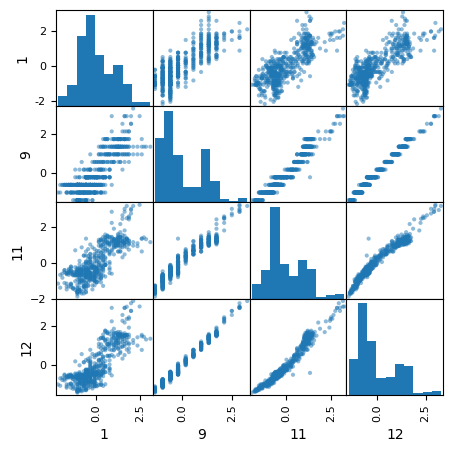

In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

scatter_matrix(pd.DataFrame(X_train_scaled)[listInd], figsize=(5, 5))
plt.show()

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn.linear_model import LogisticRegression

logRegEst = LogisticRegression(tol=1e-3, solver='saga', max_iter=1000, multi_class='multinomial', penalty='elasticnet', random_state=42, n_jobs=-1)
logRegEst.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [9]:
from sklearn.model_selection  import GridSearchCV

param_grid_logreg = {'C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 15, 20, 50, 100], 'l1_ratio': np.arange(0, 1.1, 0.1)}
optimizer_logreg = GridSearchCV(logRegEst, param_grid_logreg, n_jobs=-1)

optimizer_logreg.fit(X_train_scaled, y_train)
print(optimizer_logreg.best_params_)

{'C': 100, 'l1_ratio': 0.0}


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

clf = LogisticRegression(tol=1e-3, solver='saga', max_iter=1000, multi_class='multinomial', penalty='elasticnet', n_jobs=-1, 
                         random_state=42, C=optimizer_logreg.best_params_['C'], l1_ratio=optimizer_logreg.best_params_['l1_ratio']) . fit(X_train_scaled, y_train)

proba_test = clf.predict_proba(X_test_scaled)
prediction = clf.predict(X_test_scaled)

print("accuracy score =", accuracy_score(y_test, prediction))
print("f1 score =", f1_score(y_test, prediction, average='macro'))

accuracy score = 0.8047138047138047
f1 score = 0.8073590456463502


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

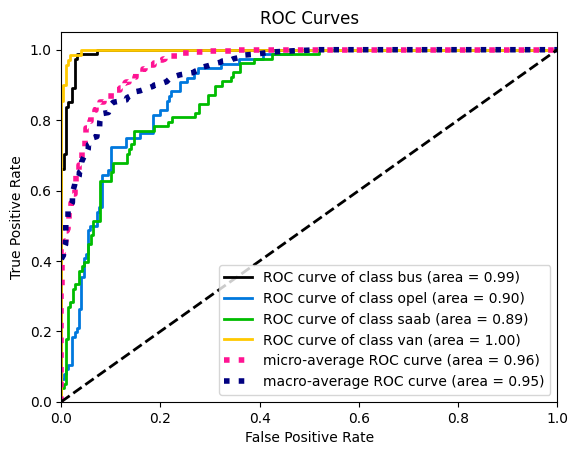

In [11]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# %pip install scikit-plot
from scikitplot.metrics import plot_roc

plot_roc(y_test, proba_test)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

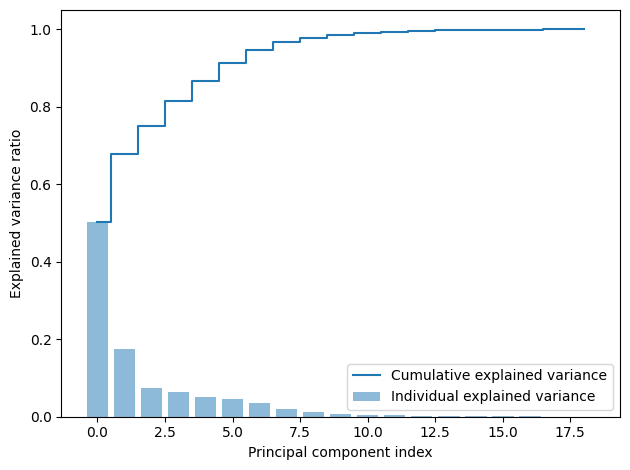

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()

principalComponents = pca.fit_transform(X_train_scaled)
exp_var_pca = pca.explained_variance_ratio_

length = len(exp_var_pca)
plt.bar(range(length), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(length), np.cumsum(exp_var_pca), where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

We can take the number of components which summary gives us $\approx$99.7% (like get from 3$\sigma$ in the normal distribution)

In [13]:
from sklearn.decomposition import PCA

optimal_components = next(x for x, val in enumerate(np.cumsum(exp_var_pca)) if val > 0.997)
print("number of components which gives us 99.7% is", optimal_components)
pca = PCA(n_components=optimal_components, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

number of components which gives us 99.7% is 13


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [14]:
from sklearn.linear_model import LogisticRegression

logRegEst = LogisticRegression(tol=1e-3, solver='saga', max_iter=1000, multi_class='multinomial', penalty='elasticnet', random_state=42, n_jobs=-1)

In [15]:
from sklearn.model_selection  import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 15, 20, 50, 100], 'l1_ratio': np.arange(0, 1.1, 0.1)}
optimizer = GridSearchCV(logRegEst, param_grid, n_jobs=-1)

optimizer.fit(X_train_pca, y_train)
print(optimizer.best_params_)

{'C': 0.5, 'l1_ratio': 0.7000000000000001}


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

clf = LogisticRegression(tol=1e-3, solver='saga', max_iter=1000, multi_class='multinomial', penalty='elasticnet', n_jobs=-1, 
                         random_state=42, C=optimizer.best_params_['C'], l1_ratio=optimizer.best_params_['l1_ratio']) . fit(X_train_pca, y_train)

proba_test = clf.predict_proba(X_test_pca)
prediction = clf.predict(X_test_pca)

print("accuracy score =", accuracy_score(y_test, prediction))
print("f1 score =", f1_score(y_test, prediction, average='macro'))

accuracy score = 0.7441077441077442
f1 score = 0.744898934046144


**Accuracy was falling, but we use less components and it is faster and result is not bad** 

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

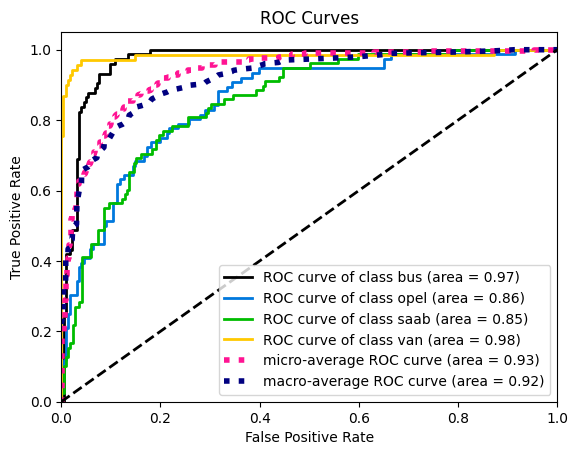

In [17]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, proba_test)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import GridSearchCV

param_grid_tree = {'max_depth': np.arange(1, 15)}
desitionTreeEst = DecisionTreeClassifier(random_state=42)
optimizer_dectree = GridSearchCV(desitionTreeEst, param_grid_tree, n_jobs=-1)

optimizer_dectree.fit(X_train_pca, y_train)

print(optimizer_dectree.best_params_)

{'max_depth': 5}


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

clf = DecisionTreeClassifier(max_depth=optimizer_dectree.best_params_['max_depth'], random_state=42) . fit(X_train_pca, y_train)

proba_test = clf.predict_proba(X_test_pca)
prediction = clf.predict(X_test_pca)

print("accuracy score =", accuracy_score(y_test, prediction))
print("f1 score =", f1_score(y_test, prediction, average='macro'))

accuracy score = 0.6195286195286195
f1 score = 0.6258885223772256


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

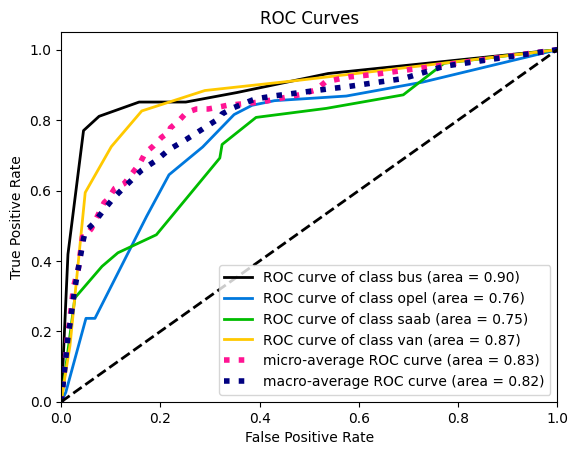

In [83]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, proba_test)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

I will use train data after pca preprocessing for less runtime

In [21]:
# bootstrap
import numpy as np
from sklearn.utils import resample

N_max = 100
train_for_bags = np.hstack((X_train_pca, y_train[:, np.newaxis]))

all_train_bags = np.array([resample(train_for_bags) for _ in range(N_max)])

print(all_train_bags.shape)

(100, 549, 14)


In [22]:
# train new models for each bag with finding optimal hyperparameters for each bag
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import GridSearchCV
from tqdm import tqdm

logreg_models = []
dectree_models = []

param_grid_logreg = {'C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 15, 20, 50, 100], 'l1_ratio': np.arange(0, 1.1, 0.1)}
logRegEst = LogisticRegression(tol=1e-3, solver='saga', max_iter=1000, multi_class='multinomial', penalty='elasticnet', random_state=42, n_jobs=-1)
optimizer_logreg = GridSearchCV(logRegEst, param_grid_logreg, n_jobs=-1)

param_grid_tree = {'max_depth': np.arange(1, 15)}
desitionTreeEst = DecisionTreeClassifier(random_state=42)
optimizer_dectree = GridSearchCV(desitionTreeEst, param_grid_tree, n_jobs=-1)

for bag in tqdm(all_train_bags):
    optimizer_logreg.fit(bag[:, :-1], bag[:, -1])
    optimizer_dectree.fit(bag[:, :-1], bag[:, -1])

    clf_logreg = LogisticRegression(tol=1e-3, solver='saga', max_iter=1000, multi_class='multinomial', penalty='elasticnet', n_jobs=-1, 
                         random_state=42, C=optimizer_logreg.best_params_['C'], l1_ratio=optimizer_logreg.best_params_['l1_ratio']) . fit(bag[:, :-1], bag[:, -1])
    clf_dectree = DecisionTreeClassifier(max_depth=optimizer_dectree.best_params_['max_depth'], random_state=42) . fit(bag[:, :-1], bag[:, -1])

    logreg_models.append(clf_logreg)
    dectree_models.append(clf_dectree)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [22:51<00:00, 13.71s/it]


In [30]:
# get predictions for each model on test data
logreg_pred  = np.array([model.predict(X_test_pca) for model in logreg_models])
dectree_pred = np.array([model.predict(X_test_pca) for model in dectree_models])

In [35]:
# get mode for predictions
import warnings
from scipy.stats import mode

warnings.simplefilter('ignore', DeprecationWarning)

ensemble_sizes = range(2, N_max, 5)
average_logreg_pred  = np.array([np.ravel(mode(logreg_pred [:size], axis=0)[0]) for size in ensemble_sizes])
average_dectree_pred = np.array([np.ravel(mode(dectree_pred[:size], axis=0)[0]) for size in ensemble_sizes])

In [36]:
# get scores w.r.t ensemble size
from sklearn.metrics import accuracy_score, f1_score

accuracies_logreg = [accuracy_score(y_test, prediction) for prediction in average_logreg_pred]
f1_logreg = [f1_score(y_test, prediction, average='macro') for prediction in average_logreg_pred]

accuracies_dectree = [accuracy_score(y_test, prediction) for prediction in average_dectree_pred]
f1_dectree = [f1_score(y_test, prediction, average='macro') for prediction in average_dectree_pred]

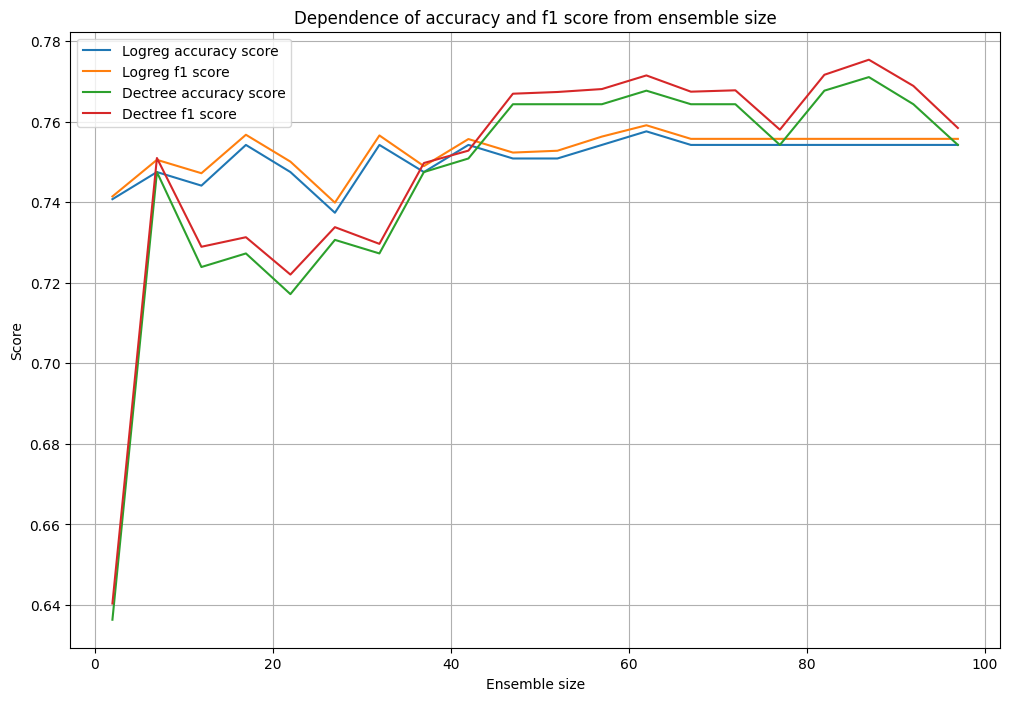

In [72]:
# plot scores
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(ensemble_sizes, accuracies_logreg, label='Logreg accuracy score')
plt.plot(ensemble_sizes, f1_logreg, label='Logreg f1 score')
plt.plot(ensemble_sizes, accuracies_dectree, label='Dectree accuracy score')
plt.plot(ensemble_sizes, f1_dectree, label='Dectree f1 score')

plt.title('Dependence of accuracy and f1 score from ensemble size')
plt.xlabel("Ensemble size")
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(':')
plt.show()

It is clearly seen that the f1 score and accuracy of the log reg are almost indistinguishable, while the f1 score and accuracy of the decision tree are increasing. Trees are good in ensembles, they are easily retrained and they themselves are highly sample dependent, so the more trees that are built from samples (and then the results are averaged), the better they capture the general patterns of the data. For trees, you can even take 90 resamples (although apparently it comes to an asymptote around 50), but for log reg this is not so relevant, you can take around 30.

Optimal hyperparameters depend quite strongly on the sample (at least this happened in my case, both for log reg and for trees). Therefore, I calculated the optimal ones for each model separately

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [74]:
from sklearn.ensemble import RandomForestClassifier

sizes = np.arange(2, 100, 5)
models = [RandomForestClassifier(n_estimators=i, random_state=42, n_jobs=-1) . fit(X_train_pca, y_train) for i in sizes]
predictions = [model.predict(X_test_pca) for model in models]

In [68]:
from sklearn.metrics import accuracy_score, f1_score

accuracies_rndForest = [accuracy_score(y_test, prediction) for prediction in predictions]
f1_rndForest = [f1_score(y_test, prediction, average='macro') for prediction in predictions]

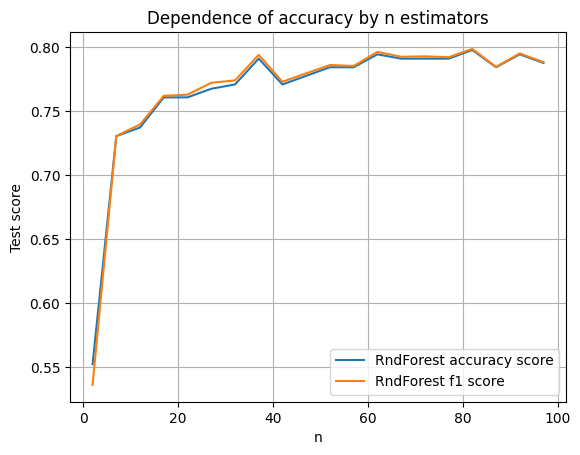

In [73]:
import matplotlib.pyplot as plt

plt.plot(sizes, accuracies_rndForest, label='RndForest accuracy score')
plt.plot(sizes, f1_rndForest, label='RndForest f1 score')
plt.title('Dependence of accuracy by n estimators')
plt.xlabel("n")
plt.ylabel('Test score')
plt.legend(loc='best')
plt.grid(':')
plt.show()

Optimal number of trees is approximate 30-40, after it plot achieve it's asymptote and the improvements are not particularly significant. This plot is very similar to decision tree plot in bagging.

I think this is because they are approximately the same in their internal structure, only there we did it manually and perhaps with slightly different metrics, which could not change the behavior

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [97]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

N = 10

def plot_estimator_dependency_from_train_size(estimator, estimator_name):
    accuracy = []
    f1score = []

    all_train_ind = []
    sizes = []

    skf = StratifiedKFold(n_splits=N, shuffle=True, random_state = 42)
    
    for train_index, test_index in skf.split(X_train_scaled, y_train):
        all_train_ind.extend(test_index)
        sizes.append(len(all_train_ind))
        estimator.fit(X_train_scaled[all_train_ind], y_train[all_train_ind])
        predictions = estimator.predict(X_test_scaled)
        accuracy.append(accuracy_score(y_test, predictions))
        f1score.append(f1_score(y_test, predictions, average='macro'))

    plt.plot(sizes, accuracy, label=f'acc. {estimator_name}')
    plt.plot(sizes, f1score, label=f'f1 {estimator_name}')
    plt.title(f'Dependence of accuracy and f1 score by train size for {estimator_name}')
    plt.xlabel("size")
    plt.ylabel('Score')
    plt.legend()
    plt.grid(':')
    plt.show()

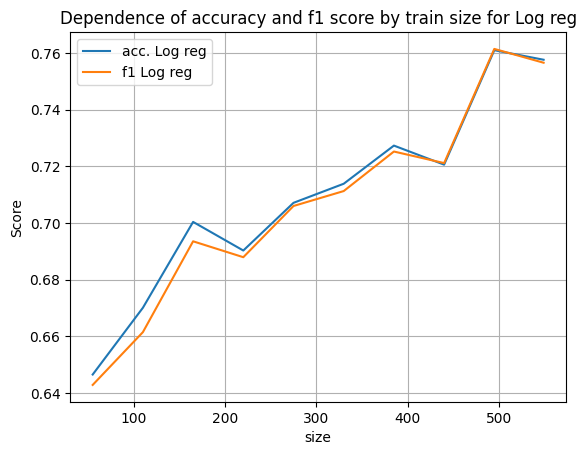

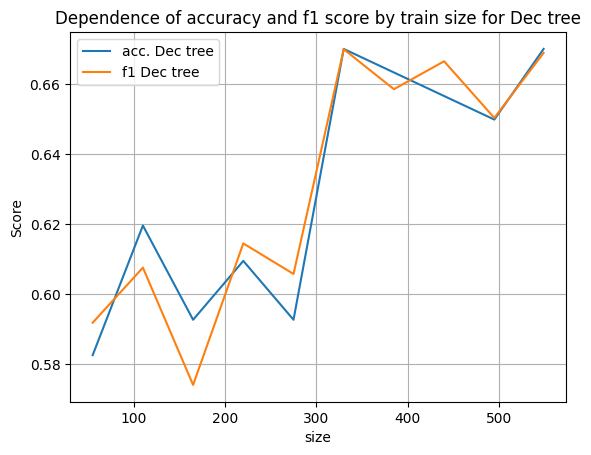

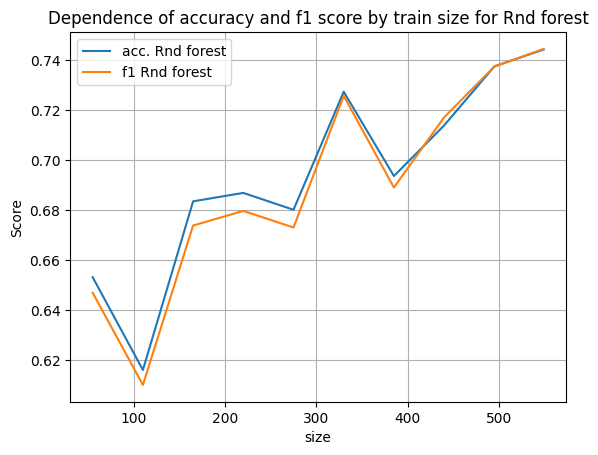

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

log_reg_best_params = optimizer_logreg.best_params_
dec_tree_best_params = optimizer_dectree.best_params_
rnd_forest_best_params = {'n_estimators': 37}

logreg_Est = LogisticRegression(tol=1e-3, solver='saga', max_iter=1000, multi_class='multinomial', penalty='elasticnet', n_jobs=-1, 
                         random_state=42, C=log_reg_best_params['C'], l1_ratio=log_reg_best_params['l1_ratio'])
dectree_Est = DecisionTreeClassifier(max_depth=dec_tree_best_params['max_depth'], random_state=42)
rndForest_Est = RandomForestClassifier(n_estimators=rnd_forest_best_params['n_estimators'], random_state=42, n_jobs=-1)

plot_estimator_dependency_from_train_size(logreg_Est, 'Log reg')
plot_estimator_dependency_from_train_size(dectree_Est, 'Dec tree')
plot_estimator_dependency_from_train_size(rndForest_Est, 'Rnd forest')

Each model tends to increase accuracy and f1 score with increasing train size.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [112]:
from numpy import mean
from numpy import std
from sklearn.model_selection  import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

model = XGBClassifier()
n_estimators = range(2, 100, 5)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train_encoded)

print(grid_result.best_params_)

model = XGBClassifier(n_estimators=grid_result.best_params_['n_estimators']) . fit(X_train_scaled, y_train_encoded)

prediction = le.inverse_transform(model.predict(X_test_scaled))

print("accuracy score =", accuracy_score(y_test, prediction))
print("f1 score =", f1_score(y_test, prediction, average='macro'))

{'n_estimators': 37}
accuracy score = 0.7373737373737373
f1 score = 0.7391690047862685


We use simple grid for searcg and maybe it is not best parameter, but it is ok for our goals. Optimal number trees is 37 on this grid and it is very similar to bagging optimal number and we get 0.73 accuracy not so bad